# Chapter 3: Binary Classification Example Using IMDb Movie Data

In this section, we'll be using the built-in movie dataset provided by IMDb (Internet Movie Database).

<br>

## 3.4.1 The IMDb Dataset

We'll be using only the most frequently occurring 10,000 words in the dataset. This will allow us to maintain a manageable size.

In [1]:
from keras.datasets import imdb


(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

C:\Users\seant\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


17465344/17464789 [==============================] - 18s 1us/step


In [2]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [6]:
print("type(train_data) = {}".format(type(train_data)))
print("train_data.shape = {}".format(train_data.shape))

type(train_data) = <class 'numpy.ndarray'>
train_data.shape = (25000,)


In [7]:
print("type(train_labels) = {}".format(type(train_labels)))
print("train_labels.shape = {}".format(train_labels.shape))

type(train_labels) = <class 'numpy.ndarray'>
train_labels.shape = (25000,)


In [8]:
print(train_labels[0:10])

[1 0 0 1 0 0 1 0 1 0]


In [9]:
word_index = imdb.get_word_index()

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

1646592/1641221 [==============================] - 5s 3us/step


In [10]:
reverse_word_index

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [11]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

<br>

## 3.4.2 Preparing the Data

Remember, when you're feeding input into a neural network, you have to make sure that it's processed correctly. Otherwise, the network won't be able to function properly. In other words, you have to make them into tensors.

In [14]:
import numpy as np


def vectorize_sequences(sequences, dimension=10000):
    
    '''
    This function will essentially transform our original data into a sort of one-hot-encoded
    dictionary of each word. We'll end up with a (25000, 10000) dataset in this case.
    
    Our new data is a 2D tensor (i.e. vector data). We have 25000 samples and 10000 features. Each
    word that appears is a feature.
    
    1. Make a basic "template" of 0's.
    2. For each entry in sequences, set specific indices to 1.
    '''
    
    results = np.zeros((len(sequences), dimension))
    
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.0
        
    return results


x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [15]:
print("type(x_train) : {}".format(type(x_train)))
print("x_train.shape : {}".format(x_train.shape))

type(x_train) : <class 'numpy.ndarray'>
x_train.shape : (25000, 10000)


In [16]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

<br>

## 3.4.3 Building Your Network

Two things to consider when building a neural network are:

1. How many layers do we want?

2. How many hidden units should each layer have?

Having more layers may allow our network to perform better on training data, but it has a high possibility of overfitting the training data.

For now, we'll trust Mr. Chollet and go with a network that has a total of 3 layers each densely connected and the first and second layers having 16 hidden units each.

In [18]:
from keras import models
from keras import layers


model = models.Sequential()

model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [20]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

<br>

## 3.4 Validating Your Approach

We're going to perform cross-validation by taking 10,000 data samples from our training data as our validation data.

In [21]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

In [25]:
print("type(x_val) = {}".format(type(x_val)))
print("x_val.shape = {}".format(x_val.shape))

print()

print("type(partial_x_train) = {}".format(type(partial_x_train)))
print("partial_x_train.shape = {}".format(partial_x_train.shape))

print()

print("x_val.shape + partial_x_train.shape = {}".format((x_val.shape[0] + partial_x_train.shape[0],
                                                         x_val.shape[1])))
print("x_train.shape = {}".format(x_train.shape))

type(x_val) = <class 'numpy.ndarray'>
x_val.shape = (10000, 10000)

type(partial_x_train) = <class 'numpy.ndarray'>
partial_x_train.shape = (15000, 10000)

x_val.shape + partial_x_train.shape = (25000, 10000)
x_train.shape = (25000, 10000)


In [26]:
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [27]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 268us/step - loss: 0.4976 - acc: 0.7953 - val_loss: 0.3717 - val_acc: 0.8722
Epoch 2/20
15000/15000 [==============================] - 3s 180us/step - loss: 0.2957 - acc: 0.9046 - val_loss: 0.2990 - val_acc: 0.8910
Epoch 3/20
15000/15000 [==============================] - 3s 185us/step - loss: 0.2160 - acc: 0.9286 - val_loss: 0.3089 - val_acc: 0.8713
Epoch 4/20
15000/15000 [==============================] - 3s 180us/step - loss: 0.1742 - acc: 0.9433 - val_loss: 0.2831 - val_acc: 0.8839
Epoch 5/20
15000/15000 [==============================] - 3s 182us/step - loss: 0.1414 - acc: 0.9543 - val_loss: 0.2863 - val_acc: 0.8850
Epoch 6/20
15000/15000 [==============================] - 3s 187us/step - loss: 0.1143 - acc: 0.9653 - val_loss: 0.3087 - val_acc: 0.8809
Epoch 7/20
15000/15000 [==============================] - 3s 194us/step - 

In [28]:
history_dict = history.history

In [29]:
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

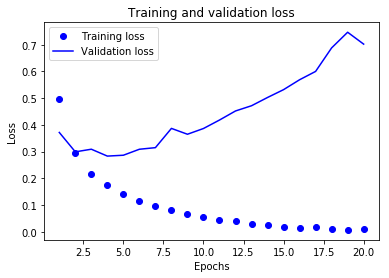

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt


history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

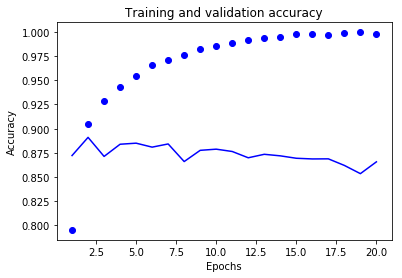

In [32]:
plt.clf()

acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')

plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.show()